#Clustering Menggunakan Algoritma DBSCAN (dengan Parameter Manual)

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setelah ditentukan fitur-fitur yang akan digunakan sesuai dengan hasil visualisasi di Colab0: https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?ouid=106950143032811372632&usp=drive_link

Maka, dibuatlah clustering dengan menggunakan algoritma DBSCAN yang bertujuan untuk memahami karakter customer pada e-commerce XYZ.

Parameter algoritma yang digunakan yaitu parameter hyperparameter tuning (berdasarkan rangkuman parameter https://docs.google.com/spreadsheets/d/1SwdHlndnVU8mGfc1X6n9RxK3bcWqKYSO6sVfMsIndkU/edit?usp=sharing ) yaitu Skema 10.


Fitur yang dipakai adalah 3 fitur yang paling berkolerasi satu sama lain yaitu:

1. OrderCount
2. CouponUsed
3. HourSpendOnApp


In [1]:
#Data Loading

import pandas as pd

url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"
df = pd.read_excel(url, sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [2]:
#Update Dataframe berdasarkan fitur yang digunakan saja

df=df[['OrderCount', 'CouponUsed', 'HourSpendOnApp']]
df

,OrderCount,CouponUsed,HourSpendOnApp
0,1.0,1.0,3.0
1,1.0,0.0,3.0
2,1.0,0.0,2.0
3,1.0,0.0,2.0
4,1.0,1.0,NaN
...,...,...,...
5625,2.0,1.0,3.0
5626,2.0,1.0,3.0
5627,2.0,1.0,3.0
5628,2.0,2.0,4.0


In [3]:
#Lihat rangkuman data apakah ada missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      5372 non-null   float64
 1   CouponUsed      5374 non-null   float64
 2   HourSpendOnApp  5375 non-null   float64
dtypes: float64(3)
memory usage: 132.1 KB


In [4]:
#Handling Missing Values
import numpy as np

df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)
df.reset_index()
df = pd.concat([df], ignore_index=True)

<ipython-input-4-cef5e865a2ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4861 non-null   float64
 1   CouponUsed      4861 non-null   float64
 2   HourSpendOnApp  4861 non-null   float64
dtypes: float64(3)
memory usage: 114.1 KB


<Axes: >

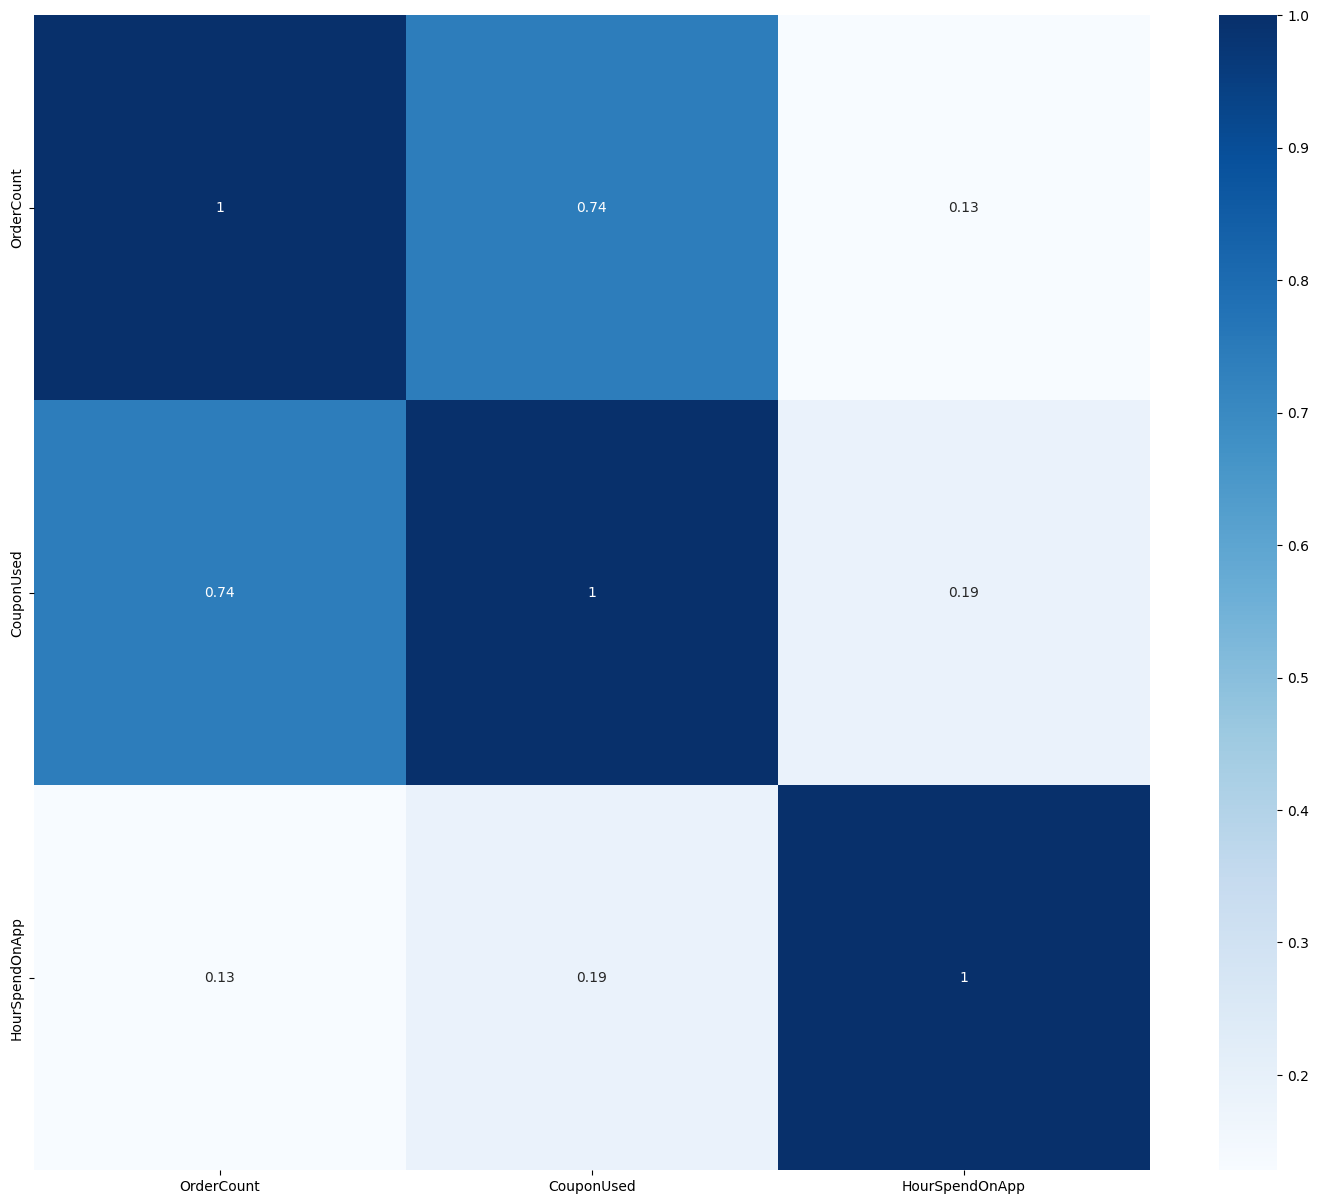

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [7]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score as shs
from sklearn.preprocessing import StandardScaler

X_train = df[['HourSpendOnApp', 'CouponUsed', 'OrderCount']]

#Skema 10 (Hyperparameter Tuning)



*   eps = {0.3, 0.5, 0.7, 1, 1.5}
*   min_samples = {5, 6, 7, 8, 9, 10}
*   metric = {'euclidean'. 'manhattan', 'cityblock', 'cosine'}



In [8]:
#Hyperparameter Tuning

epsilon = np.linspace(0.01, 1, num = 20)
epsilon

array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])

In [9]:
min_samples = np.arange(2, 25, step = 2)
min_samples

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

In [10]:
import itertools
combinations = list(itertools.product(epsilon, min_samples))
N = len(combinations)
N

240

In [11]:
from sklearn.model_selection import GridSearchCV

def Gridsearch(combinations,X_train):
  scores = []
  all_label = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_model = DBSCAN(eps = eps, min_samples = num_samples).fit(X_train)
    labels = dbscan_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -=1
    if(num_clusters < 2) or (num_clusters > 25):
      scores.append(-20)
      all_label.append("Poor")
      print(" at iteration  : ", i, "eps = ", eps, "min_samples  = ", num_samples, "number of clusters  = ", num_clusters, "moving on ...")
      continue
    scores.append(shs(X_train, labels))
    all_label.append(labels)
    print(" at iteration  = ", i, "score  : ", scores[-1], "Number of clusters : ", num_clusters)
  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_label[best_index]
  best_score = scores[best_index]
  return{'best_epsilon': best_parameters[0],
         'best_min_samples': best_parameters[1],
         'best_labels': best_labels,
         'best_score': best_score}

In [12]:
best_para = Gridsearch(combinations,X_train)

 at iteration  :  0 eps =  0.01 min_samples  =  2 number of clusters  =  196 moving on ...
 at iteration  :  1 eps =  0.01 min_samples  =  4 number of clusters  =  115 moving on ...
 at iteration  :  2 eps =  0.01 min_samples  =  6 number of clusters  =  97 moving on ...
 at iteration  :  3 eps =  0.01 min_samples  =  8 number of clusters  =  72 moving on ...
 at iteration  :  4 eps =  0.01 min_samples  =  10 number of clusters  =  53 moving on ...
 at iteration  :  5 eps =  0.01 min_samples  =  12 number of clusters  =  38 moving on ...
 at iteration  :  6 eps =  0.01 min_samples  =  14 number of clusters  =  30 moving on ...
 at iteration  :  7 eps =  0.01 min_samples  =  16 number of clusters  =  27 moving on ...
 at iteration  =  8 score  :  0.6862409377180011 Number of clusters :  25
 at iteration  =  9 score  :  0.7142063206719111 Number of clusters :  21
 at iteration  =  10 score  :  0.7051929282087784 Number of clusters :  20
 at iteration  =  11 score  :  0.7051929282087784 N

In [13]:
print(best_para)

{'best_epsilon': 0.01, 'best_min_samples': 20, 'best_labels': array([ 0,  1,  2, ...,  7, 16,  3]), 'best_score': 0.7142063206719111}


In [14]:
#Compute DBSCAN on Skema 10
#eps = 0.01
#min_samples = 20

clustering10 = DBSCAN(eps=0.01, min_samples=20).fit(X_train)
DBSCAN_dataset10 = X_train.copy()
DBSCAN_dataset10.loc[:,'Cluster'] = clustering10.labels_

In [15]:
DBSCAN_dataset10.Cluster.value_counts().to_frame()

,Cluster
-1,1089
7,518
3,497
4,411
2,410
16,383
0,353
17,338
1,316
12,76


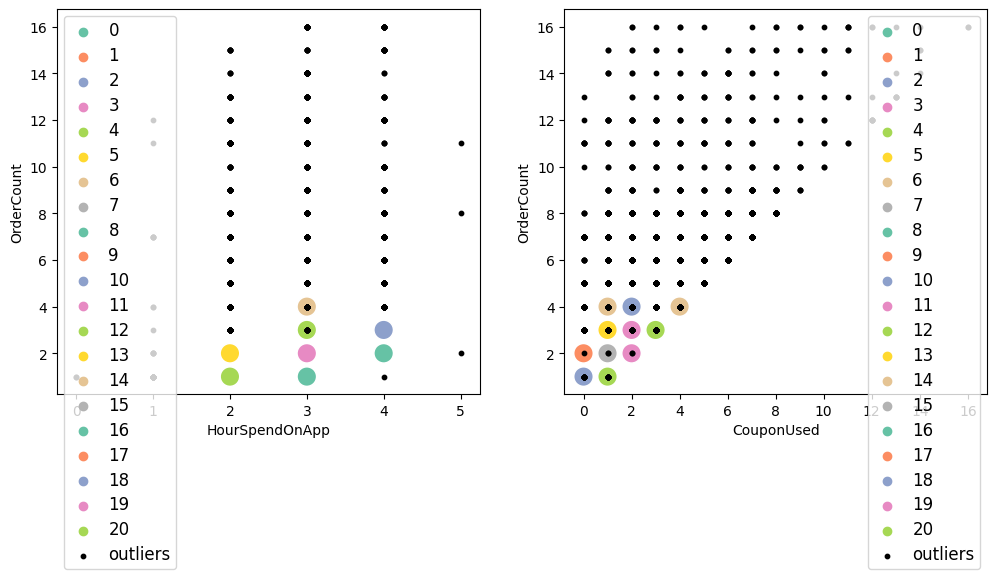

In [16]:
outliers10 = DBSCAN_dataset10[DBSCAN_dataset10['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='HourSpendOnApp', y='OrderCount',

                data=DBSCAN_dataset10[DBSCAN_dataset10['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='CouponUsed', y='OrderCount',

                data=DBSCAN_dataset10[DBSCAN_dataset10['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers10['HourSpendOnApp'], outliers10['OrderCount'], s=10, label='outliers', c="k")

axes[1].scatter(outliers10['CouponUsed'], outliers10['OrderCount'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

In [17]:
n_clusters_10 = len(set(clustering10.labels_)) - (1 if -1 in clustering10.labels_ else 0)
print('Estimated number of clusters in Skema 10: %d' % n_clusters_10)

Estimated number of clusters in Skema 10: 21


In [18]:
print("Silhouette Coefficient in Skema 10: %0.5f"
      % metrics.silhouette_score(X_train, clustering10.labels_))

Silhouette Coefficient in Skema 10: 0.71421
